
<p align="center"><img src="https://drive.google.com/uc?id=1e5qjY73xyqBjRb7fF-7cm68kdw-0g-lZ" width="70%" height="70%"></p>


<h2>PREDICTION OF NEXT DEPOSIT </H2>
<p><strong>Abstract</strong></p>
<p>The increasingly vast number of marketing campaigns
over time has reduced its effect on the general public.
Furthermore, economical pressures and competition has
led marketing managers to invest on directed campaigns
with a strict and rigorous selection of contacts. Such direct
campaigns can be enhanced through the use of Business
Intelligence (BI) and Data Mining (DM) techniques.</p>
<br>
<p>This study describes an implementation of a DM project
based on the CRISP-DM methodology. Real-world data
were collected from a Portuguese marketing campaign
related with bank deposit subscription. The business goal
is to find a model that can explain success of a contact, i.e.
if the client subscribes the deposit. </p>
<br>
<p>The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.</p>
<br>

<h4><b> <font color='blue'>DICTIONARIES / METHODS WHICH WE USED IN THIS STUDY</b><H4>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  
import seaborn as sns
from sklearn import datasets, linear_model

<h4><b> <font color='blue'>Collection of Raw Data</b><H4>

In [ ]:
bank=pd.read_csv("https://drive.google.com/uc?id=1-dNlI2AM09WHDXaf8onFxyD9anVowRZL", error_bad_lines=False, sep=";",na_values='unknown') #convert 'unknown' to np.nan values
df=bank.copy()

<P><b> <font color='RED'>TARGET VALUE DISTRIBUTION</b></P>

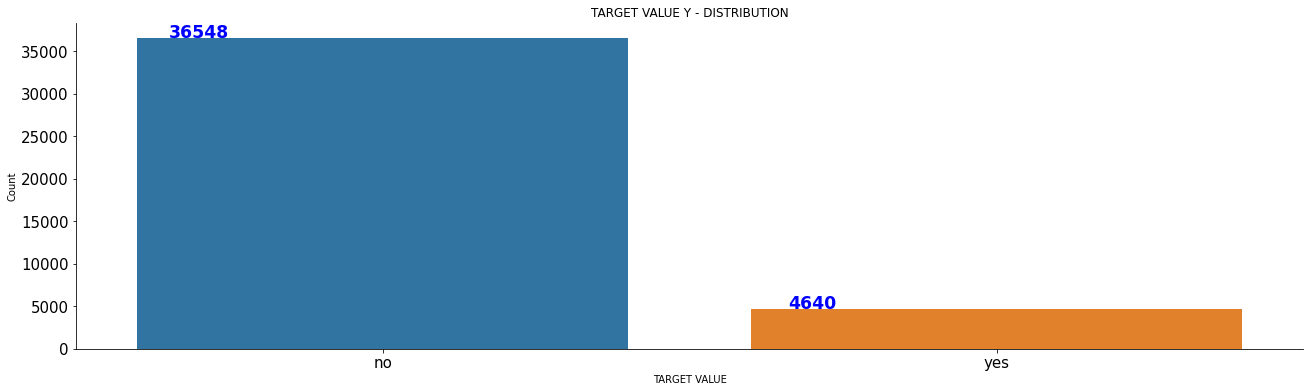

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(22,6)
sns.countplot(x="y",data=df,order=df["y"].unique())
ax.set(ylabel="Count",xlabel="TARGET VALUE",title='TARGET VALUE Y - DISTRIBUTION')
title='TARGET VALUE Y - Distribution'
ax.tick_params(labelsize=15)
sns.despine()
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),weight="bold", horizontalalignment='center', size='xx-large', color='blue')

<P><b> <font color='RED'>ROC CURVE FOR ALL MODELS</b></P>

<img src="https://drive.google.com/uc?id=1KYvcllGMm-9WJQz31aoW2r82rRS7DIB_">

In [ ]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape #dataframe number of rows and columns

(41188, 21)

In [ ]:
df.info() #dataframe feature's types, number of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe() #dataframe statistical informations

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<h3><b><font color='blue'> Data Preparation </b></h3>


<p> <li> In there we solve data type problems, importance problems and etc. </li></p>

In [ ]:
#change the columns' names
df.columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']

In [ ]:
# transforming some feature's values to 0 and 1
df["housing"]=df["housing"].replace("yes", 1)
df["housing"]=df["housing"].replace("no", 0)

df["loan"]=df["loan"].replace("yes", 1)
df["loan"]=df["loan"].replace("no", 0)   

In [ ]:
#data type convertion
df["job"]=df["job"].astype("category")
df["marital"]=df["marital"].astype("category")
df["default"]=df["default"].astype("category")
df["housing"]=df["housing"].astype("category")
df["loan"]=df["loan"].astype("category")
df["contact"]=df["contact"].astype("category")
df["month"]=df["month"].astype("category")
df["day_of_week"]=df["day_of_week"].astype("category")
#convert object to categorical variable
from pandas.api.types import CategoricalDtype
educationOrder=CategoricalDtype(categories=["illiterate","basic.4y","basic.6y","basic.9y","high.school","university.degree","professional.course"],ordered=True)
df["education"]=df["education"].astype(educationOrder)
poutcomeOrder=CategoricalDtype(categories=["nonexistent","failure","success"],ordered=True)
df["poutcome"]=df["poutcome"].astype(poutcomeOrder)

In [ ]:
# converting floats of number of employers to int bcs of meaningless
df['nr_employed']=[int(x) for x in df['nr_employed']]

In [ ]:
# feature classification
numericalColumns=["age", "duration", "campaign", "pdays", "previous", "emp_var_rate", "cons_price_idx",
                   "cons_conf_idx", "nr_employed"]
categoricalColumns=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]
categoricNominal=["job","marital","default","housing","loan","contact","month","day_of_week"]
categoricKardinal=["education","poutcome"]

In [ ]:
def distributionPlot(df,column,info=True):
  '''
  Params
  df:dataframe to use as a main data
  column: feature of dataframe to see distribution
  info: İf you want to see number of feauture True, otherwise False 
  NOTE: Default value of ınfo is equal True
  '''
  fig,ax=plt.subplots()
  fig.set_size_inches(22,6)
  sns.countplot(x=column,data=df,order=df[column].unique())
  ax.set_xlabel(column,fontsize=15)
  ax.set_ylabel("Count",fontsize=15)
  title='{} Count Distribution'.format(column.capitalize())
  ax.set_title(title,fontsize=15)
  ax.tick_params(labelsize=15)
  sns.despine()
  if info:
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),weight="bold")

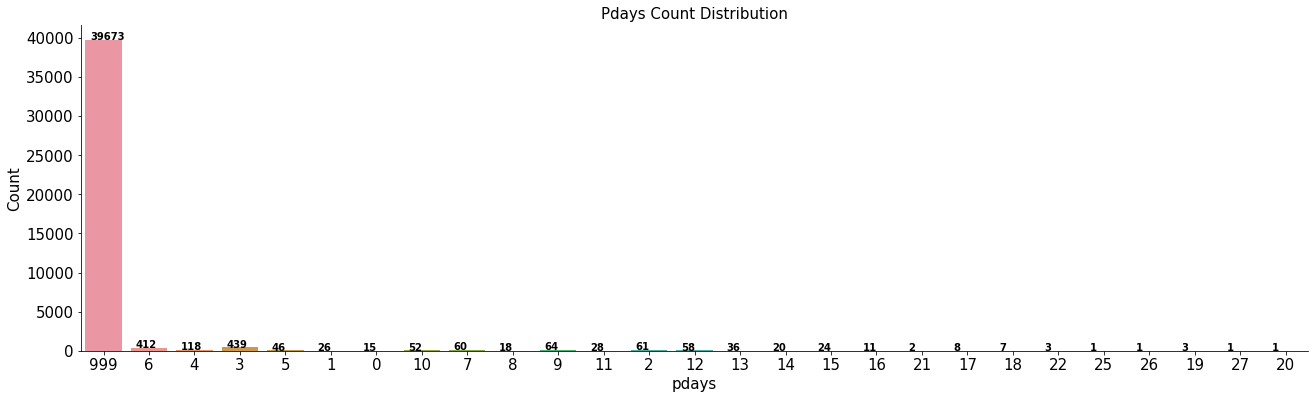

In [ ]:
#df.pdays visualization before change
distributionPlot(df,"pdays")

In [ ]:
#95% of this line has a value of 999. The remainder has different values. So we converted them to binary values 999 ->1 others ->0
df.loc[(df.pdays==999),"pdays"]=1 # Main DF changed
df.loc[(df.pdays!=1),"pdays"]=0 # Main DF changed

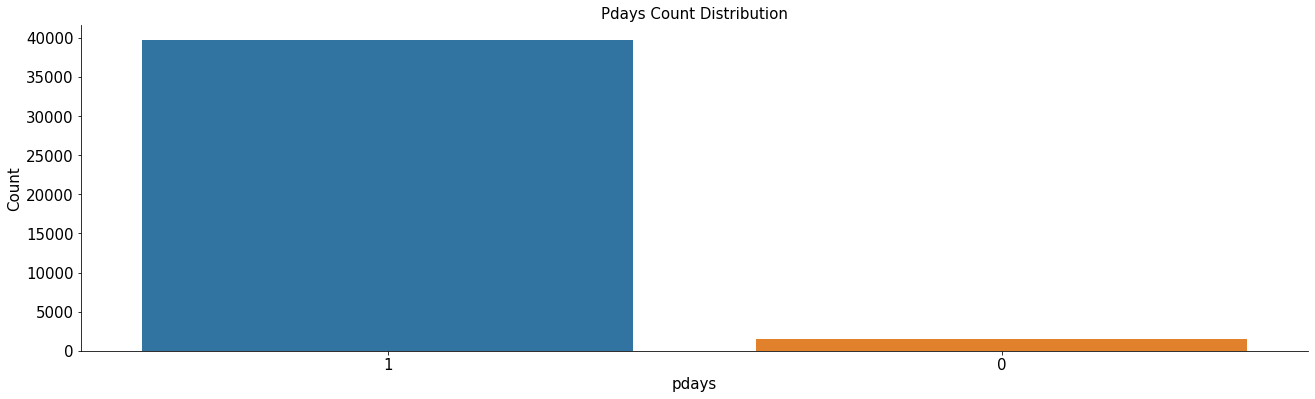

In [ ]:
#df.pdays visualization after change
distributionPlot(df,"pdays",False)

<h5><font color='DARKRED'>VISUALIZATION FOR NUMERICAL FEATURES </H5>


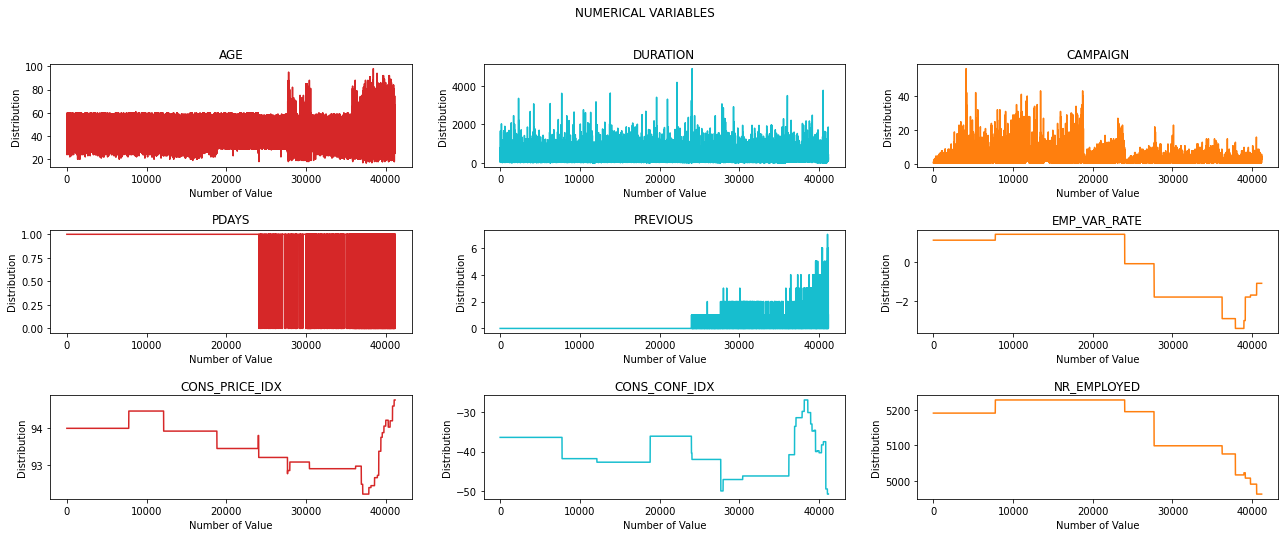

In [ ]:
#fig, axs = plt.subplots(3,3,figsize=(22,14),subplot_kw=dict(projection='polar')) mollweide
fig, axs = plt.subplots(3,3,figsize=(22,8),subplot_kw=dict(projection='rectilinear'),gridspec_kw={'hspace':0.6, 'wspace': 0.2})
fig.suptitle('NUMERICAL VARIABLES')
axs[0][0].plot(df["age"], 'tab:red')
axs[0, 0].set_title('AGE')
axs[0][1].plot(df["duration"], 'tab:cyan')
axs[0, 1].set_title('DURATION')
axs[0][2].plot(df["campaign"], 'tab:orange')
axs[0, 2].set_title('CAMPAIGN')
axs[1][0].plot(df["pdays"], 'tab:red')
axs[1, 0].set_title('PDAYS')
axs[1][1].plot(df["previous"], 'tab:cyan')
axs[1, 1].set_title('PREVIOUS')
axs[1][2].plot(df["emp_var_rate"], 'tab:orange')
axs[1, 2].set_title('EMP_VAR_RATE')
axs[2][0].plot(df["cons_price_idx"], 'tab:red')
axs[2, 0].set_title('CONS_PRICE_IDX')
axs[2][1].plot(df["cons_conf_idx"], 'tab:cyan')
axs[2, 1].set_title('CONS_CONF_IDX')
axs[2][2].plot(df["nr_employed"], 'tab:orange')
axs[2, 2].set_title('NR_EMPLOYED')
for ax in axs.flat:
    ax.set(xlabel='Number of Value', ylabel='Distribution')

In [ ]:
def dataframeInformations(df):
  totalEntryList=[]
  totalMissingValueList=[]
  missingValRateList=[]
  dataTypeList=[]
  uniqueValuesList=[]
  totalUniqueValList=[]
  variableNameList=[]
  
  for element in df.columns:
    missingValRate=round((df[element].isna().sum()/len(df[element]))*100,2) #to show correct decimal and float part of number.
    totalEntryList.append(len(df[element]))
    totalMissingValueList.append(df[element].isna().sum())
    missingValRateList.append(missingValRate)
    dataTypeList.append(df[element].dtype)
    uniqueValuesList.append(list(df[element].unique()))
    totalUniqueValList.append(len(df[element].unique()))
    variableNameList.append(element)
  #create a dataframe to show all informations together
  dataInfoDf=pd.DataFrame({'Variable':variableNameList,'#_Total_Entry':totalEntryList,\
                           '#_Missing_Value':totalMissingValueList,'%_Missing_Value':missingValRateList,\
                           'Data_Type':dataTypeList,'Unique_Values':uniqueValuesList,\
                           '#_Uniques_Values':totalUniqueValList})
  return dataInfoDf.sort_values(by="Variable")


In [ ]:
dataInfo=dataframeInformations(df)
variableList=[element for element in dataInfo['Variable'] ]
dataInfo=dataInfo.set_index('Variable')
dataInfo

,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Uniques_Values
Variable,,,,,,
age,41188,0,0.00,int64,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5...",78
campaign,41188,0,0.00,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19...",42
cons_conf_idx,41188,0,0.00,float64,"[-36.4, -41.8, -42.7, -36.1, -40.4, -42.0, -45...",26
cons_price_idx,41188,0,0.00,float64,"[93.994, 94.465, 93.91799999999999, 93.444, 93...",26
contact,41188,0,0.00,category,"[telephone, cellular]",2
day_of_week,41188,0,0.00,category,"[mon, tue, wed, thu, fri]",5
default,41188,8597,20.87,category,"[no, nan, yes]",3
duration,41188,0,0.00,int64,"[261, 149, 226, 151, 307, 198, 139, 217, 380, ...",1544
education,41188,1731,4.20,category,"[basic.4y, high.school, basic.6y, basic.9y, pr...",8


In [ ]:
featuresInformations=pd.read_csv("https://drive.google.com/uc?id=12uck97ajxRSA4YkpaKQsfZr1OtLO5TdQ")
featuresInformations.drop(featuresInformations.index)
featuresInformations.head(5)

,Variable_Definition,Variable_Structure
0,age,NUMERIC - DISCRETE
1,number of contacts performed during this campa...,NUMERIC - DISCRETE
2,consumer confidence index,NUMERIC - CONTINUOUS
3,consumer price index,NUMERIC - CONTINUOUS
4,contact communication type,CATEGORICAL - NOMINAL


In [ ]:
#add columns explanation and columns type in dataInfo
variableDefinition=list(featuresInformations['Variable_Definition'])
variableStructure=(featuresInformations['Variable_Structure'])
variableStructure=[x.lower() for x in variableStructure] #uppercase not working well in dataFrame therefore we converted all elements to lowercase
dataInfo['Variable_Definition']=variableDefinition
dataInfo['Variable_Structure']=variableStructure
dataInfo

,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Uniques_Values,Variable_Definition,Variable_Structure
Variable,,,,,,,,
age,41188,0,0.00,int64,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5...",78,age,numeric - discrete
campaign,41188,0,0.00,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19...",42,number of contacts performed during this campa...,numeric - discrete
cons_conf_idx,41188,0,0.00,float64,"[-36.4, -41.8, -42.7, -36.1, -40.4, -42.0, -45...",26,consumer confidence index,numeric - continuous
cons_price_idx,41188,0,0.00,float64,"[93.994, 94.465, 93.91799999999999, 93.444, 93...",26,consumer price index,numeric - continuous
contact,41188,0,0.00,category,"[telephone, cellular]",2,contact communication type,categorical - nominal
day_of_week,41188,0,0.00,category,"[mon, tue, wed, thu, fri]",5,last contact day of the week,categorical - nominal
default,41188,8597,20.87,category,"[no, nan, yes]",3,has credit in default?,categorical - nominal
duration,41188,0,0.00,int64,"[261, 149, 226, 151, 307, 198, 139, 217, 380, ...",1544,"last contact duration, in seconds",numeric - discrete
education,41188,1731,4.20,category,"[basic.4y, high.school, basic.6y, basic.9y, pr...",8,education status,categorical - ordinal


In [ ]:
#this function find imputation technique using by missing rate
def findMethod(df,variableList):
  df['Imputation_Technique']=""
  for element in variableList:
      missingRate=float(dataInfo['%_Missing_Value'][element])
      if missingRate == 0:
          df['Imputation_Technique'][element]='No Missing Value'
      elif missingRate <= 5:
          df['Imputation_Technique'][element]='Simple'
      elif missingRate < 25:
          df['Imputation_Technique'][element]='Tree-based'
      elif missingRate < 50 :
          df['Imputation_Technique'][element]='Model'

In [ ]:
findMethod(dataInfo,variableList)

In [ ]:
dataInfo

,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Uniques_Values,Variable_Definition,Variable_Structure,Imputation_Technique
Variable,,,,,,,,,
age,41188,0,0.00,int64,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5...",78,age,numeric - discrete,No Missing Value
campaign,41188,0,0.00,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19...",42,number of contacts performed during this campa...,numeric - discrete,No Missing Value
cons_conf_idx,41188,0,0.00,float64,"[-36.4, -41.8, -42.7, -36.1, -40.4, -42.0, -45...",26,consumer confidence index,numeric - continuous,No Missing Value
cons_price_idx,41188,0,0.00,float64,"[93.994, 94.465, 93.91799999999999, 93.444, 93...",26,consumer price index,numeric - continuous,No Missing Value
contact,41188,0,0.00,category,"[telephone, cellular]",2,contact communication type,categorical - nominal,No Missing Value
day_of_week,41188,0,0.00,category,"[mon, tue, wed, thu, fri]",5,last contact day of the week,categorical - nominal,No Missing Value
default,41188,8597,20.87,category,"[no, nan, yes]",3,has credit in default?,categorical - nominal,Tree-based
duration,41188,0,0.00,int64,"[261, 149, 226, 151, 307, 198, 139, 217, 380, ...",1544,"last contact duration, in seconds",numeric - discrete,No Missing Value
education,41188,1731,4.20,category,"[basic.4y, high.school, basic.6y, basic.9y, pr...",8,education status,categorical - ordinal,Simple


<h5> CORRELATION MATRIX OF THE DATASET </H5>
<p><li>A correlation matrix is a table showing correlation coefficients between variables</li></p>
<p><li>A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.</li></p>

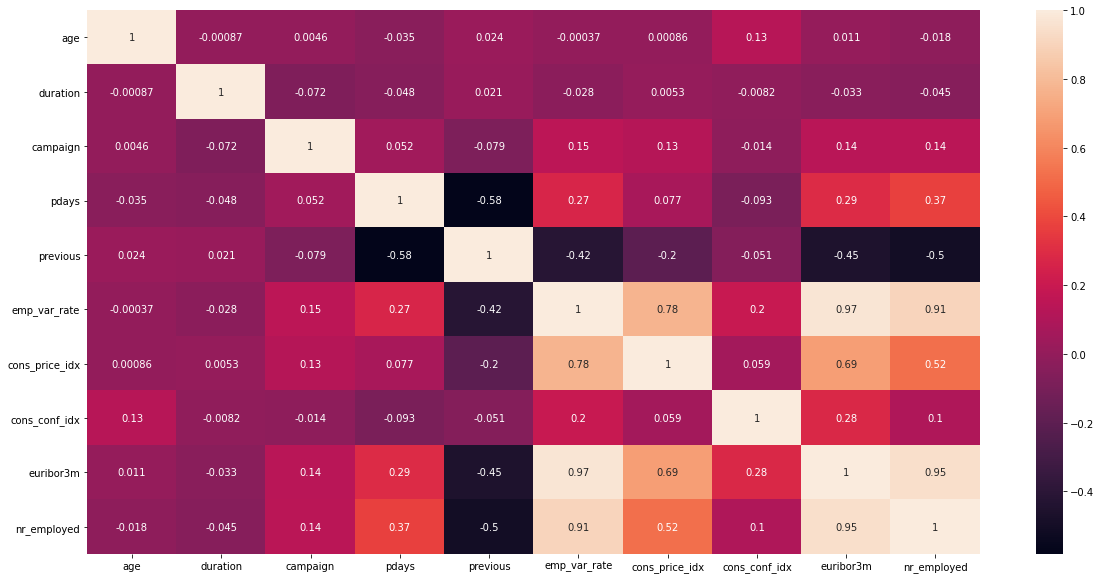

In [ ]:
# to show relation between features
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

<h3><b> TRAIN AND TEST SPLIT </b></h3>

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop("y", axis=1)
y=df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape , X_test.shape , y_train.shape, y_test.shape

((30891, 20), (10297, 20), (30891,), (10297,))

<h5><b><font color='DARKRED'>VISUALIZE ALL FEATURES TO SEE DISTRIBUTION ON TRAIN DATA </B></H5>

In [ ]:
def visualizeAllFeatures(df):
  #fig, axs = plt.subplots(3,3,figsize=(22,14),subplot_kw=dict(projection='polar')) mollweide
  fig, axs = plt.subplots(5,4,figsize=(22,15),subplot_kw=dict(projection='rectilinear'),gridspec_kw={'hspace':0.5, 'wspace': 0.3})
  sns.countplot(df["age"],ax=axs[0][0])
  sns.countplot(df["job"],ax=axs[0][1])
  sns.countplot(df["marital"],ax=axs[0][2])
  sns.countplot(df["education"],ax=axs[0][3])
  #
  sns.countplot(df["default"],ax=axs[1][0])
  sns.countplot(df["housing"],ax=axs[1][1])
  sns.countplot(df["loan"],ax=axs[1][2])
  sns.countplot(df["contact"],ax=axs[1][3])
   #
  sns.countplot(df["month"],ax=axs[2][0])
  sns.countplot(df["day_of_week"],ax=axs[2][1])
  sns.countplot(df["duration"],ax=axs[2][2])
  sns.countplot(df["campaign"],ax=axs[2][3])
  #
  sns.countplot(df["pdays"],ax=axs[3][0])
  sns.countplot(df["previous"],ax=axs[3][1])
  sns.countplot(df["poutcome"],ax=axs[3][2])
  sns.countplot(df["emp_var_rate"],ax=axs[3][3])
  #
  sns.countplot(df["cons_price_idx"],ax=axs[4][0])
  sns.countplot(df["cons_conf_idx"],ax=axs[4][1])
  sns.countplot(df["euribor3m"],ax=axs[4][2])
  sns.countplot(df["nr_employed"],ax=axs[4][3])
  fig.show()

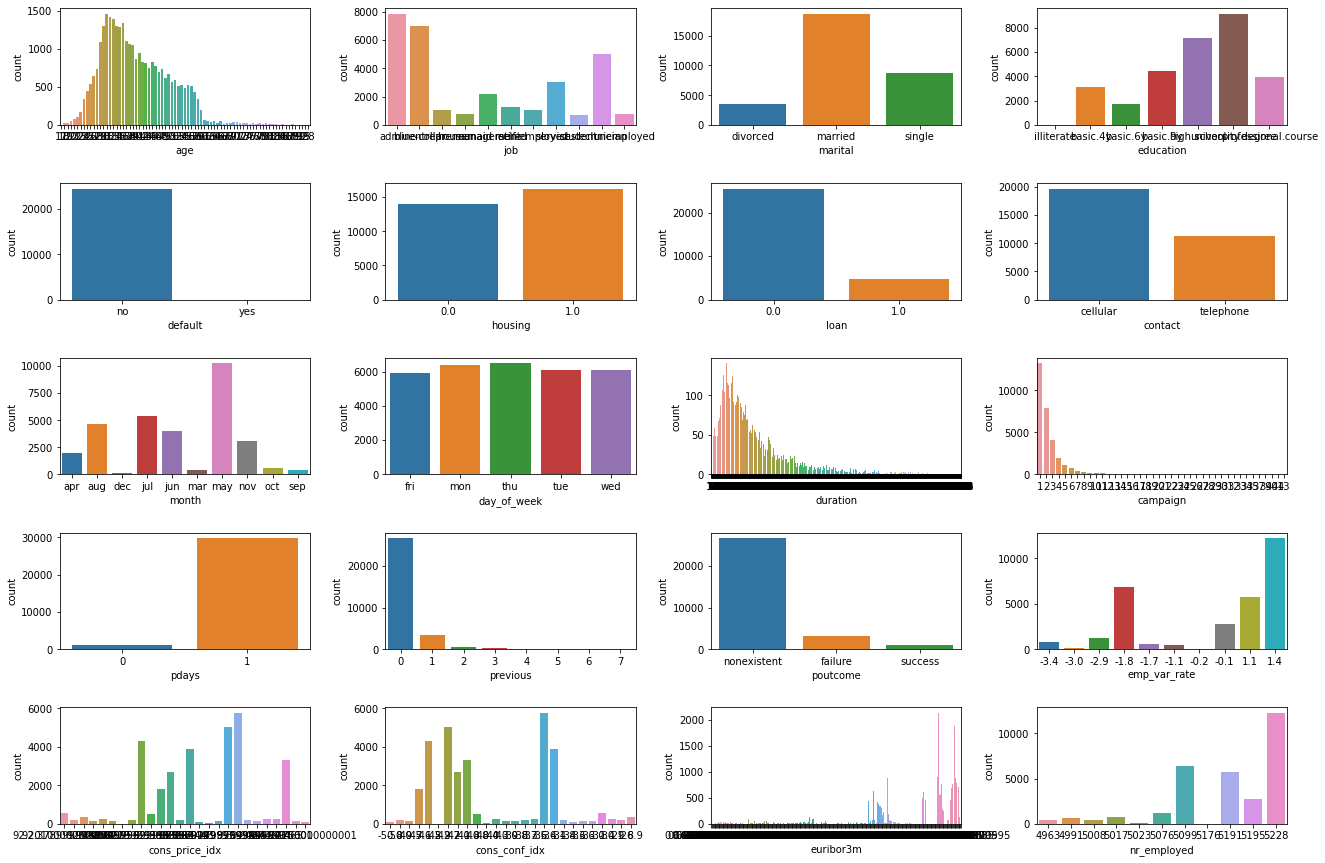

In [ ]:
visualizeAllFeatures(X_train)

<h3><b> HANDLE OUTLIERS </b></h3>






In [ ]:
#for numerical features
def boxPlotForNumerical(df):
  fig,ax=plt.subplots(nrows = 3, ncols = 3, figsize=(18,10),subplot_kw=dict(projection='rectilinear'),gridspec_kw={'hspace':0.5, 'wspace': 0.3})
  sns.boxplot(x = "age", data = df, orient = 'v', ax = ax[0][0])
  ax[0][0].set_title('Distribution', fontsize=15)
  ax[0][0].tick_params(labelsize=15)

  sns.boxplot(x = "duration", data = df, orient = 'v', ax = ax[0][1])
  ax[0][1].set_title('"Distribution"', fontsize=15)
  ax[0][1].tick_params(labelsize=15)

  sns.boxplot(x = "campaign", data = df, orient = 'v', ax = ax[0][2])
  ax[0][2].set_title('Distribution', fontsize=15)
  ax[0][2].tick_params(labelsize=15)

  sns.boxplot(x = "pdays", data = df, orient = 'v', ax = ax[1][0])
  ax[1][0].set_title('Distribution', fontsize=15)
  ax[1][0].tick_params(labelsize=15)

  sns.boxplot(x = "previous", data = df, orient = 'v', ax = ax[1][1])
  ax[1][1].set_title('Distribution', fontsize=15)
  ax[1][1].tick_params(labelsize=15)

  sns.boxplot(x = "emp_var_rate", data = df, orient = 'v', ax = ax[1][2])
  ax[1][2].set_title('Distribution', fontsize=15)
  ax[1][2].tick_params(labelsize=15)

  sns.boxplot(x = "cons_price_idx", data = df, orient = 'v', ax = ax[2][0])
  ax[2][0].set_title('Distribution', fontsize=15)
  ax[2][0].tick_params(labelsize=15)

  sns.boxplot(x = "cons_conf_idx", data = df, orient = 'v', ax = ax[2][1])
  ax[2][1].set_title('Distribution', fontsize=15)
  ax[2][1].tick_params(labelsize=15)

  sns.boxplot(x = "nr_employed", data = df, orient = 'v', ax = ax[2][2])
  ax[2][2].set_title('Distribution', fontsize=15)
  ax[2][2].tick_params(labelsize=15)

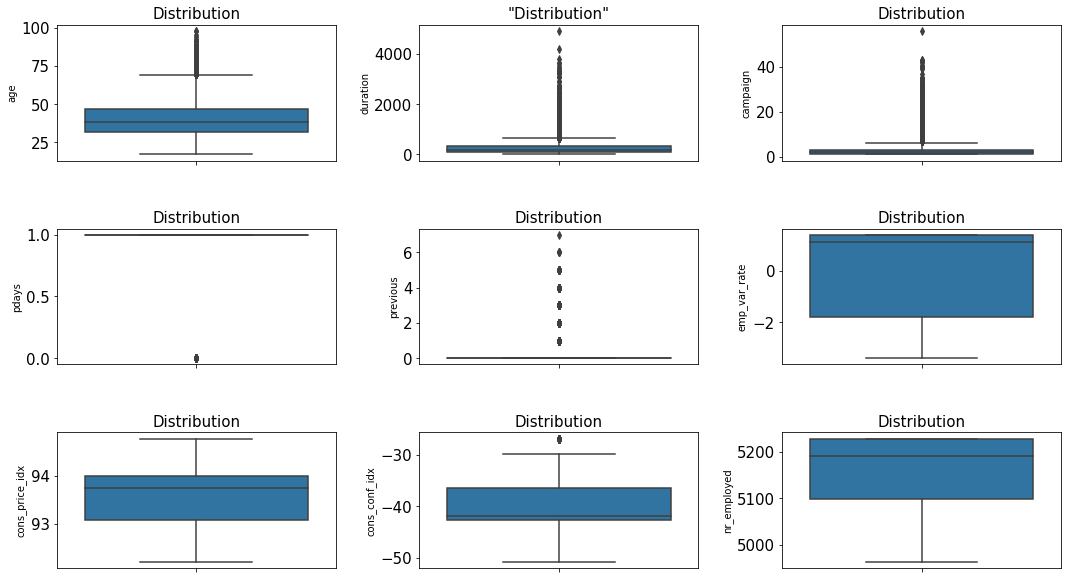

In [ ]:
boxPlotForNumerical(df)

In [ ]:
#this function will return for numerical values number of outlier if it's exist
def findOutlierForNumerical(df,column,coefficient=1.5):
    import matplotlib.pyplot as plt
    numberOfValue=len(df[column])
    sorted(df[column])
    Q1,Q3=np.percentile(df[column], [25,75])
    IQR = Q3 - Q1
    lowerbound = Q1 - (coefficient * IQR)
    upperbound = Q3 + (coefficient * IQR)
    lowerbound, upperbound
    dfOutlier=df[(df[column] < lowerbound) | (df[column] > upperbound)]
    numberOfOutlier=len(dfOutlier[column])
    print(column,'s outlier number is: ',numberOfOutlier)   
    # which values are outlier
    fig1,ax1=plt.subplots()
    ax1.pie([numberOfValue,numberOfOutlier],labels=["Normal Values","Outlier Values"],autopct='%1.1f%%',shadow=True, startangle=90,colors=["#900C3F","#00FFFF"],explode = (0.1,0.1))
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()
    return df

age s outlier number is:  356


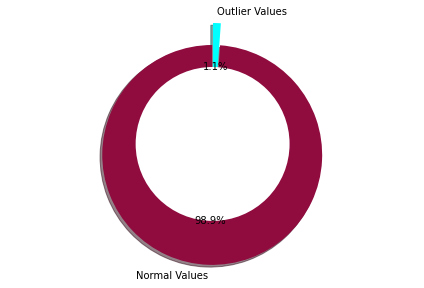

duration s outlier number is:  2227


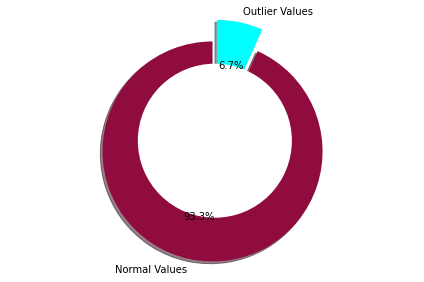

campaign s outlier number is:  1808


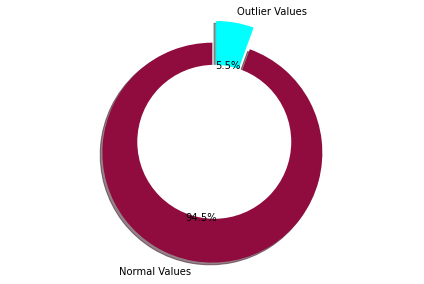

pdays s outlier number is:  1097


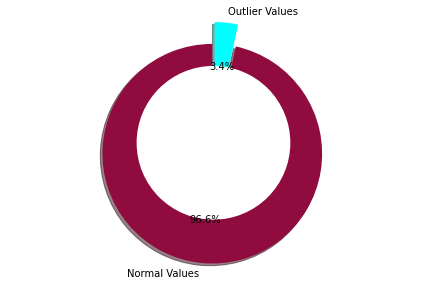

previous s outlier number is:  4213


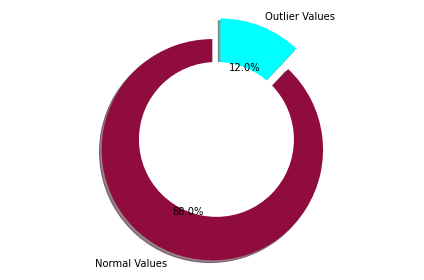

emp_var_rate s outlier number is:  0


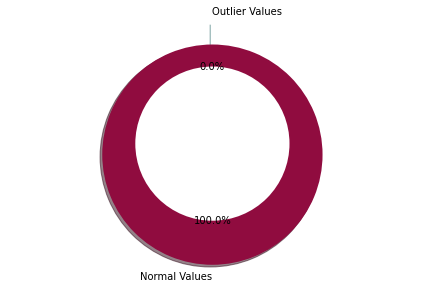

cons_price_idx s outlier number is:  0


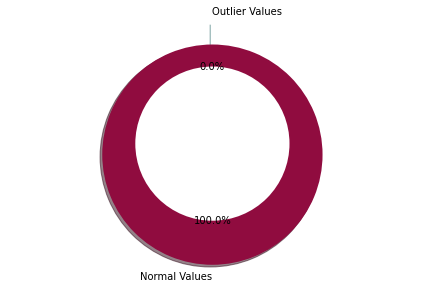

cons_conf_idx s outlier number is:  347


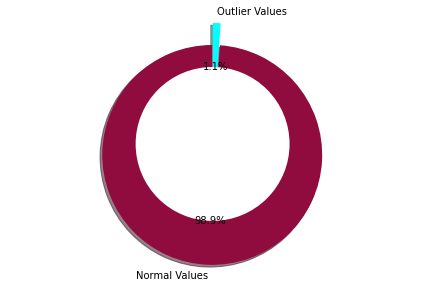

nr_employed s outlier number is:  0


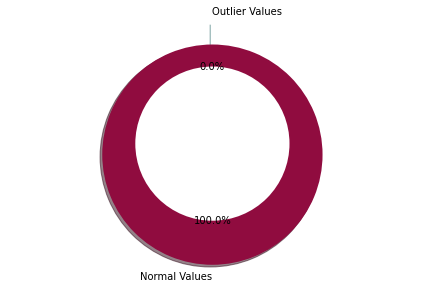

In [ ]:
for column in numericalColumns:
  X_train[column]=findOutlierForNumerical(X_train,column,coefficient=1.5)

In [ ]:
X_train.shape,y_train.shape

((30891, 20), (30891,))

<h3><b> HANDLE MISSING VALUE</b></h3>

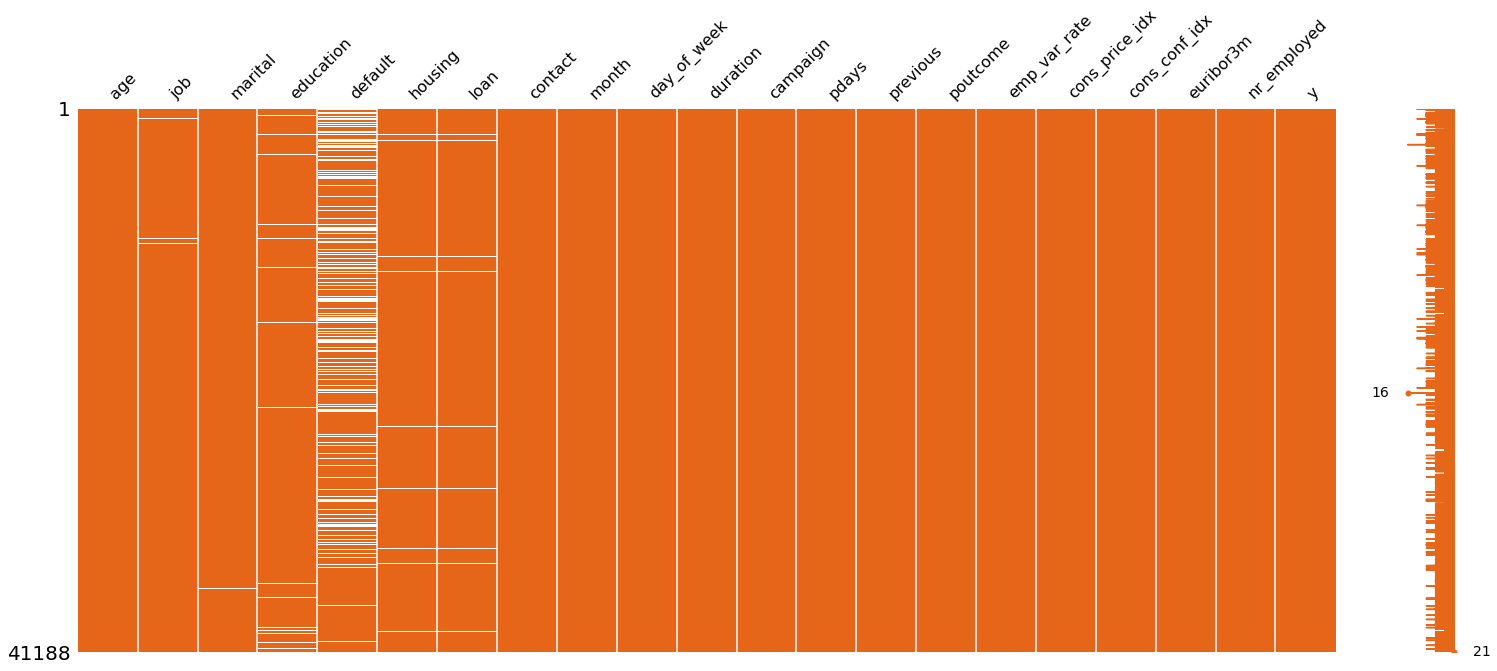

In [ ]:
  import missingno as msno
  msno.matrix(df,sparkline=True,color=(0.9,0.4,0.1))

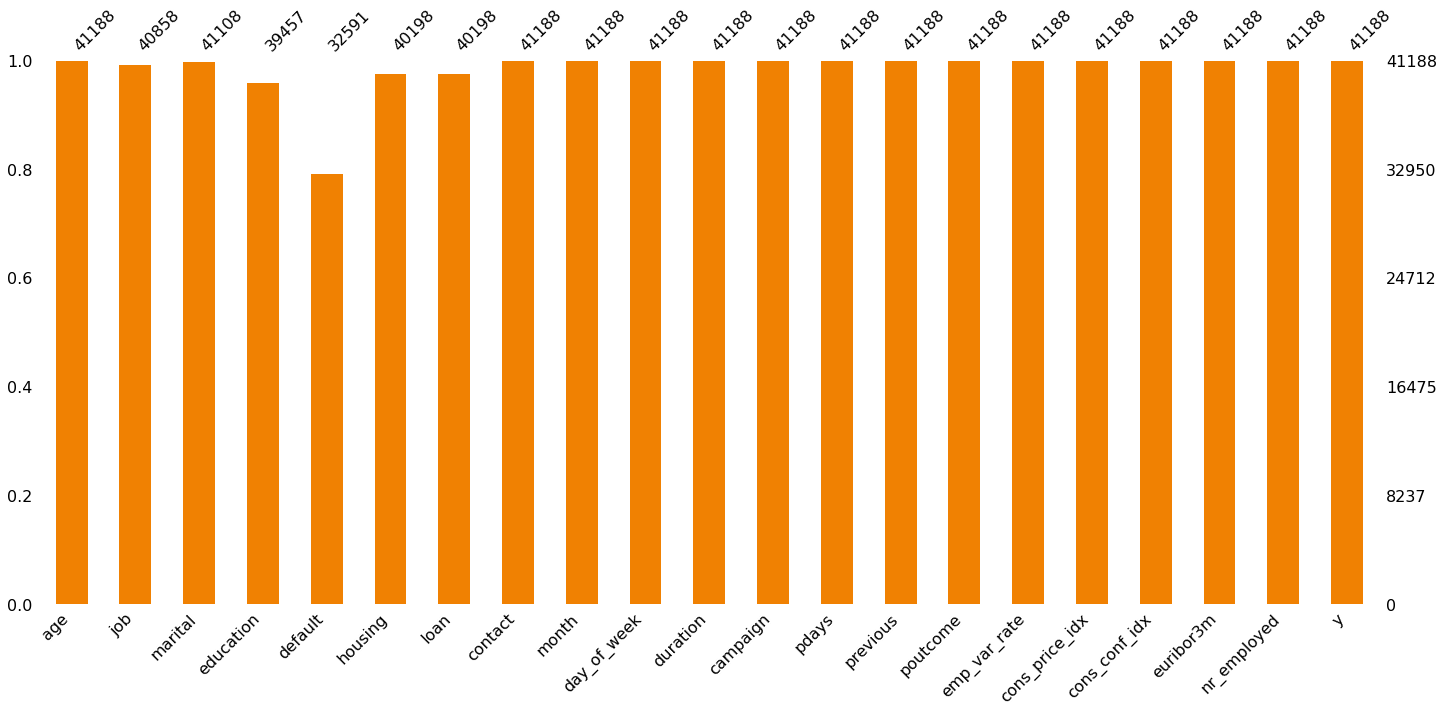

In [ ]:
msno.bar(df,color='#F08102')

<h6>SIMPLE IMPUTATION FOR CATEGORICAL VALUES</H6>

In [ ]:
#if missing rate between 0-5 and categorical data use this method
def missingvalImputeMF(df,column):
  valueList=list(df[column])
  mostFrequentVal=max(set(valueList), key = valueList.count)
  df[column]=df[column].fillna(mostFrequentVal) 

In [ ]:
def missingImpute(df):
  for col in df.columns:
    infoStr=""
    missingRatioRate=int(round((df[col].isna().sum()/len(df[col]))*100,2))
    if missingRatioRate==0:
      infoStr+="{} - There is no missing value".format(col)
      if str(df[col].dtype)=="category":
        infoStr+=" - Category"
        print(infoStr)
      else:
        infoStr+=" - Numerical"
        print(infoStr)
      print("--------------------------"),
      infoStr+=" {} - Ratio:{}% 0-5".format(col,missingRatioRate)
      if str(df[col].dtype)=="category":
        #if column's missing rate between 0% - 5% and categorical variable
        missingvalImputeMF(df,col)
        missingRatioRate=round((df[col].isna().sum()/len(df[col]))*100,2)
        infoStr+="{} -  There is no missing value".format(col)
        infoStr+=" - Category"
        print("DONE {} ".format(infoStr))
      else:
        infoStr+=" - Numerical"
        print(infoStr)
      print("--------------------------")
    elif missingRatioRate<=25:
      infoStr+="{} - Ratio:{}% 5-25".format(col,missingRatioRate)
      if str(df[col].dtype)=="category":
        infoStr+=" - Category"
        print(infoStr)
      else:
        infoStr+=" - Numerical"
        print(infoStr)
      print("--------------------------")
    elif missingRatioRate<=50:
      infoStr+="{} - Ratio:{}% 25-50".format(col,missingRatioRate)
      if str(df[col].dtype)=="category":
        infoStr+=" - Category"
        print(infoStr)
      else:
        infoStr+=" - Numerical"
        print(infoStr)
      print("--------------------------")
    elif missingRatioRate<=95:
      infoStr+="{} - Ratio:{}% 50-95".format(col,missingRatioRate)
      if str(df[col].dtype)=="category":
        infoStr+=" - Category"
        print(infoStr)
      else:
        infoStr+=" - Numerical"
        print(infoStr)
      print("--------------------------")
    else:
      infoStr+="{} - Ratio:{}% 95-100".format(col,missingRatioRate)
      if str(df[col].dtype)=="category":
        infoStr+=" - Category"
        print(infoStr)
      else:
        infoStr+=" - Numerical"
        print(infoStr)
      print("--------------------------")


In [ ]:
missingImpute(X_train)

age - There is no missing value - Numerical
--------------------------
age - There is no missing value - Numerical age - Ratio:0% 0-5 - Numerical
--------------------------
job - There is no missing value - Category
--------------------------
DONE job - There is no missing value - Category job - Ratio:0% 0-5job -  There is no missing value - Category 
--------------------------
marital - There is no missing value - Category
--------------------------
DONE marital - There is no missing value - Category marital - Ratio:0% 0-5marital -  There is no missing value - Category 
--------------------------
education - Ratio:4% 5-25 - Category
--------------------------
default - Ratio:20% 5-25 - Category
--------------------------
housing - Ratio:2% 5-25 - Category
--------------------------
loan - Ratio:2% 5-25 - Category
--------------------------
contact - There is no missing value - Category
--------------------------
DONE contact - There is no missing value - Category contact - Ratio:0% 0-

In [ ]:
#default feature's missing rate is equal 26% so we asssigned na as an new category for X_train
X_train['default'] = X_train['default'].cat.add_categories('unknown')
X_train['default'].fillna('unknown', inplace =True) 

In [ ]:
#default feature's missing rate is equal 26% so we asssigned na as an new category for X_test
X_test['default'] = X_test['default'].cat.add_categories('unknown')
X_test['default'].fillna('unknown', inplace =True)

In [ ]:
y_test.replace('no',0,inplace=True)
y_test.replace('yes',1,inplace=True)
y_train.replace('no',0,inplace=True)
y_train.replace('yes',1,inplace=True)

<H5 style="align:center;">CORELATION MATRIX BETWEEN FEATURES</H5>

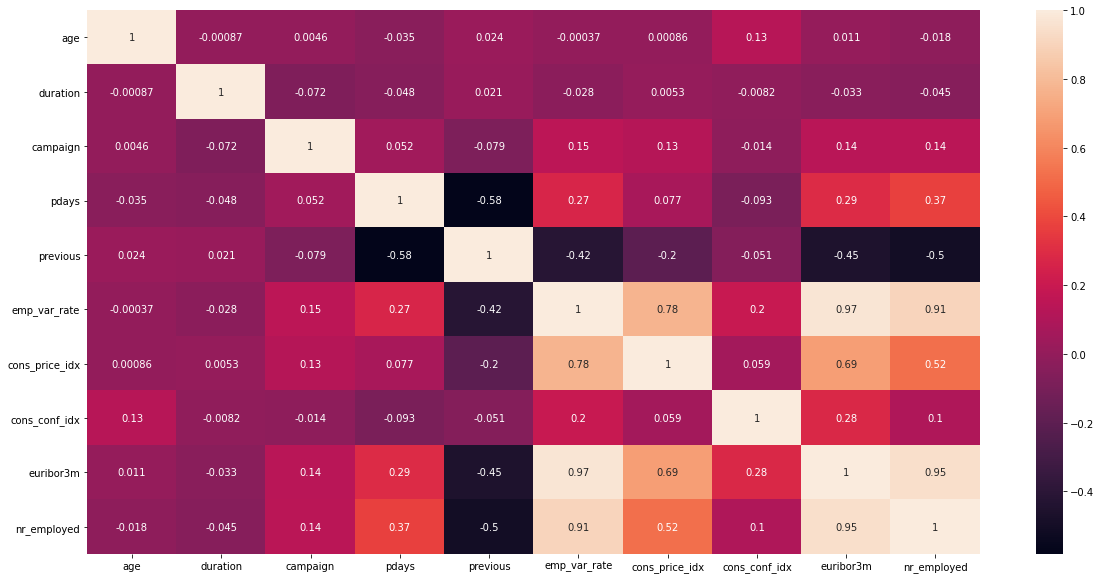

In [ ]:
# to show relation between features
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

<h3><b> ENCODING</b></h3>

In [ ]:
!pip install category_encoders

<h5><b> Encoding for Categorical Variables </b></h5>

In [ ]:
def binaryEncoding(df,column):
  from category_encoders import BinaryEncoder
  encoder=BinaryEncoder(cols=[column])
  df=encoder.fit_transform(df)
  return df
def oneHotEncoding(df,column):
  from category_encoders import OneHotEncoder
  encoder=OneHotEncoder(cols=[column])
  df = encoder.fit_transform(df)
  return df
def encodingForCategoricalFeature(df,categoricalColumns):
  for element in categoricalColumns:
    if len(df[element].unique())<=5:
      df=oneHotEncoding(df,element)
    else:
      df=binaryEncoding(df,element)
  return df

In [ ]:
X_train=encodingForCategoricalFeature(X_train,categoricalColumns)

In [ ]:
X_test=encodingForCategoricalFeature(X_test,categoricalColumns)

<h5><b> Scaling for Numerical Variables </b></h5>

In [ ]:
from sklearn import preprocessing
#X_train
X_train.loc[:,numericalColumns]=preprocessing.normalize(X_train.loc[:,numericalColumns])
#X_test
X_test.loc[:,numericalColumns]=preprocessing.normalize(X_test.loc[:,numericalColumns])

<p>FEATURE IMPORTANCE GRAPHIC </P>

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.080734144936527e-07, 0.007267828544781277, 0.008090544880801225, 0.011691906134985244, 0.012426501867255578, 0.014133976698758412, 0.015635020318414607, 0.01638493288764467, 0.018209266618674308, 0.018223551977421284, 0.018611726761811047, 0.019001803826051954, 0.019126024720505043, 0.019141145993491027, 0.019287166657602623, 0.019433120607070718, 0.02033507483435431, 0.020591589379224003, 0.02344856526135643, 0.025030113044166188, 0.02523230980962089, 0.025421273281878938, 0.02631468262065493, 0.02897148088680645, 0.029132022586005724, 0.0296064265880249, 0.03143149250750999, 0.034122860230034024, 0.0375764700703425, 0.04476087442543865, 0.0587581869760676, 0.3026013509298311]


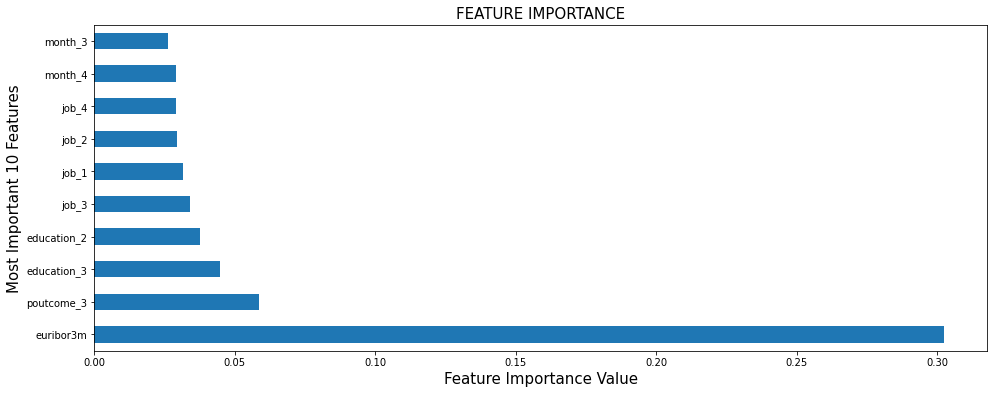

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X_train,y_train)
print(sorted(model.feature_importances_)) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
plt.figure(figsize=(16,6))
plt.xlabel('Feature Importance Value',fontsize=15)
plt.ylabel("Most Important 10 Features",fontsize=15)
plt.title("FEATURE IMPORTANCE",fontsize=15)
feat_importances.nlargest(10).plot(kind='barh')
plt.show();

In [ ]:
def rocCurveGraphic(model,X_test,y_test):
    from sklearn.metrics import plot_roc_curve
    plt.figure(figsize=(12,6))
    plt.title('Receiver Operating Characteristic Curve')
    ax = plt.gca()
    disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)

<h3> <b> MODELLING </B></H3>

<h6><font color='DARKBLUE'>LOGISTIC REGRESSION MODEL<H6>

In [ ]:
def logisticRegressionModel(X_train,Y_train):
    #use logistic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    print('Logistic Regression Training Accuracy:',log.score(X_train,Y_train))
    return log,log.score(X_train,Y_train)

In [ ]:
log,logScore=logisticRegressionModel(X_train,y_train)

Logistic Regression Training Accuracy: 0.8988378492117445


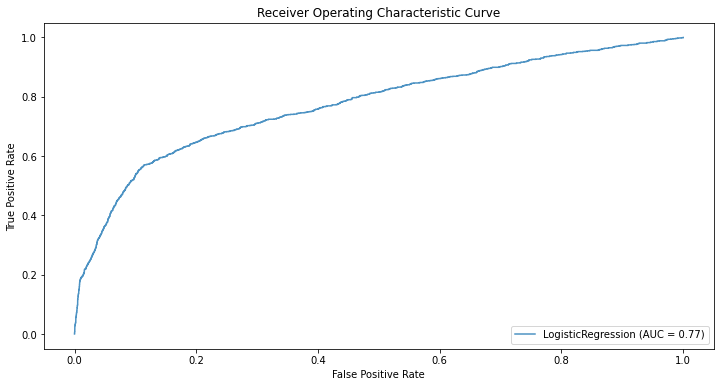

In [ ]:
rocCurveGraphic(log,X_test,y_test)

<h6><font color='DARKBLUE'>KNeıghbors MODEL <H6>

In [ ]:
def knnNeighborsModel(X_train,Y_train):
    #use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
    knn.fit(X_train,Y_train)
    print('\nK Neighbors Training Accuracy:',knn.score(X_train,Y_train))
    return knn,knn.score(X_train,Y_train)

In [ ]:
knn,knnScore=knnNeighborsModel(X_train,y_train)


K Neighbors Training Accuracy: 0.911495257518371


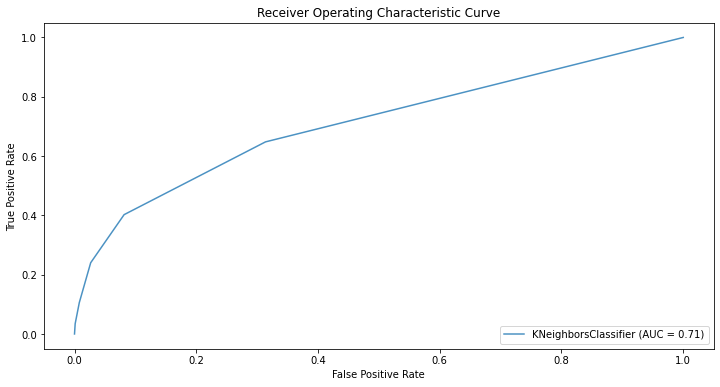

In [ ]:
rocCurveGraphic(knn,X_test,y_test)

<h6><font color='DARKBLUE'>SUPPORT VECTOR MACHINE LINEAR MODEL <H6>

In [ ]:
def svcLinearModel(X_train,Y_train):
    #use SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel="linear",random_state=0,probability=True)
    svc_lin.fit(X_train,Y_train)
    print('\n[2]SVC Linear Training Accuracy:',svc_lin.score(X_train,Y_train))
    return svc_lin,svc_lin.score(X_train,Y_train)

In [ ]:
svc_lin,svc_linScore=svcLinearModel(X_train,y_train)


[2]SVC Linear Training Accuracy: 0.8975429736816548


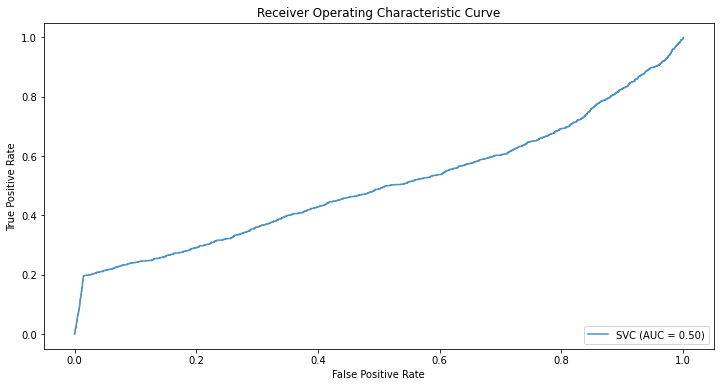

In [ ]:
rocCurveGraphic(svc_lin,X_test,y_test)

<h6><font color='DARKBLUE'>SUPPORT VECTOR MACHINE RBF MODEL <H6>

In [ ]:
def svcRBFModel(X_train,Y_train):
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel="rbf",random_state=0,probability=True)
    svc_rbf.fit(X_train,Y_train)
    print('\nSVC RBF Training Accuracy:',svc_rbf.score(X_train,Y_train))
    return svc_rbf,svc_rbf.score(X_train,Y_train)

In [ ]:
svc_rbf,svc_rbfScore=svcRBFModel(X_train,y_train)


SVC RBF Training Accuracy: 0.8981580395584474


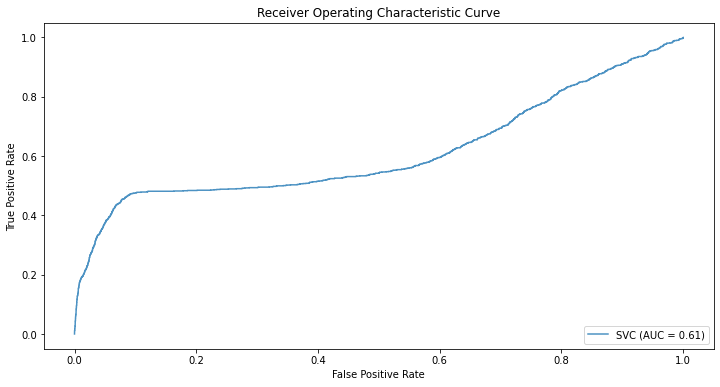

In [ ]:
rocCurveGraphic(svc_rbf,X_test,y_test)

<h6><font color='DARKBLUE'>GAUSSIAN NAIVE BAYES MODEL <H6>

In [ ]:
def gaussianBayesModel(X_train,Y_train):
    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,Y_train)
    print('\nGaussian Training Accuracy:',gauss.score(X_train,Y_train))
    return gauss,gauss.score(X_train,Y_train)

In [ ]:
gauss,gaussScore=gaussianBayesModel(X_train,y_train)


Gaussian Training Accuracy: 0.5084005050014567


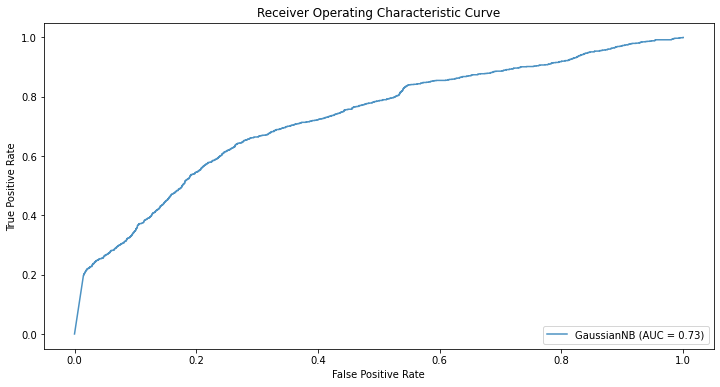

In [ ]:
rocCurveGraphic(gauss,X_test,y_test)

<h6><font color='DARKBLUE'>DECISION TREE MODEL <H6>

In [ ]:
def decisionTreeModel(X_train,Y_train):
    #use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion="entropy",random_state=0)
    tree.fit(X_train,Y_train)
    print('\nDecision Tree Training Accuracy:',tree.score(X_train,Y_train))
    return tree,tree.score(X_train,Y_train)

In [ ]:
tree,treeScore=decisionTreeModel(X_train,y_train)


Decision Tree Training Accuracy: 0.9686316402835777


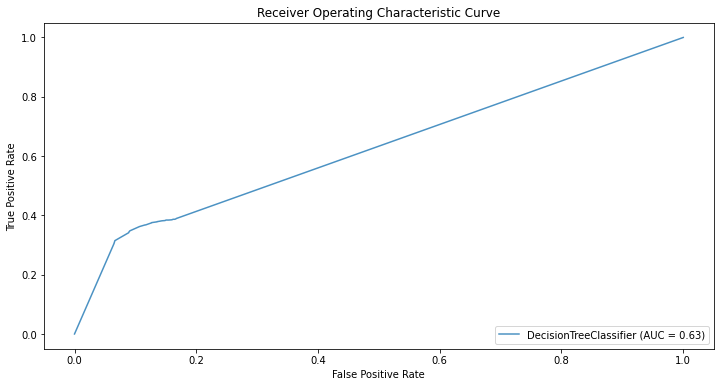

In [ ]:
rocCurveGraphic(tree,X_test,y_test)

<h6><font color='DARKBLUE'>RANDOM FOREST MODEL <H6>

In [ ]:
def randomForestModel(X_train,Y_train):
    #use Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
    forest.fit(X_train,Y_train)
    print('\nRandom Forest Training Accuracy:',forest.score(X_train,Y_train))
    return forest,forest.score(X_train,Y_train)

In [ ]:
forest,forestScore=randomForestModel(X_train,y_train)


Random Forest Training Accuracy: 0.9618335437506069


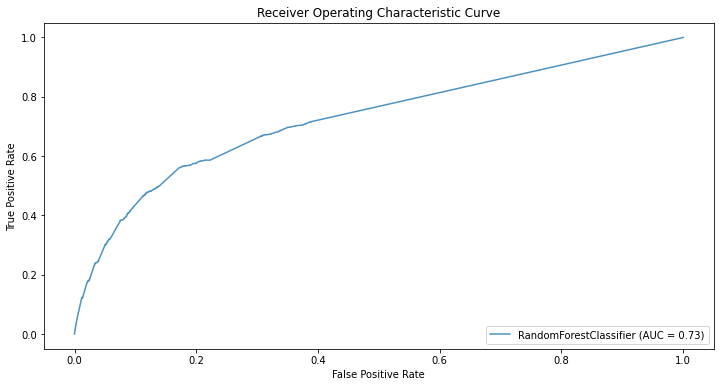

In [ ]:
rocCurveGraphic(forest,X_test,y_test)

<h6><font color='DARKBLUE'>HIST GRADIENT BOOSTING MODEL <H6>

In [ ]:
def histGradientModel(X_train,Y_train):
    # use Hist Gradient Boosting Classifier
    from sklearn.experimental import enable_hist_gradient_boosting
    from sklearn.ensemble import HistGradientBoostingClassifier
    histgrad=HistGradientBoostingClassifier()
    histgrad.fit(X_train,y_train)
    print('\nHist Gradient Boosting Training Score:',histgrad.score(X_train,Y_train))
    return histgrad,histgrad.score(X_train,Y_train)

In [ ]:
histgrad,histgradScore=histGradientModel(X_train,y_train)


Hist Gradient Boosting Training Score: 0.9113010261888576


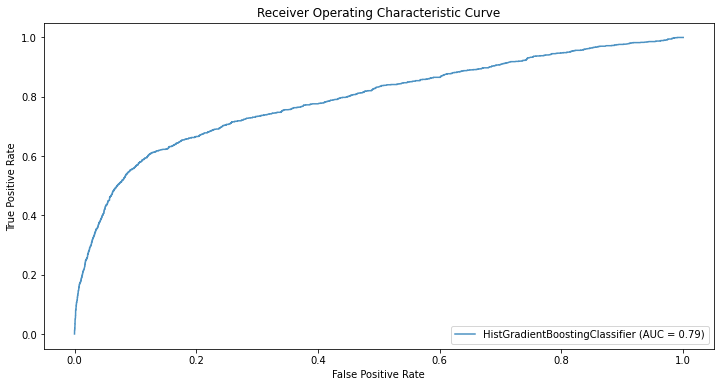

In [ ]:
rocCurveGraphic(histgrad,X_test,y_test)

<h6><font color='DARKBLUE'>XGBM BOOSTING MODEL <H6>

In [ ]:
def xgbmBoostingModel(X_train,Y_train):
    # use GBM
    from sklearn.ensemble import GradientBoostingClassifier
    gbm=GradientBoostingClassifier()
    gbm.fit(X_train,y_train)
    print('\nGradient Boosting Training Score:',gbm.score(X_train,Y_train))   
    return gbm,gbm.score(X_train,Y_train)

In [ ]:
gbm,gbmScore=xgbmBoostingModel(X_train,y_train)


Gradient Boosting Training Score: 0.9032080541257972


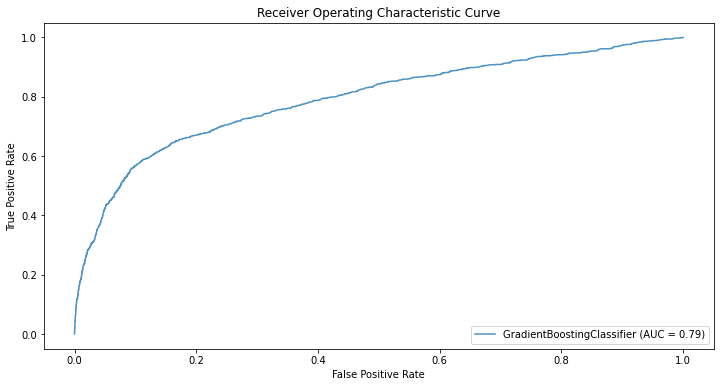

In [ ]:
rocCurveGraphic(gbm,X_test,y_test)

<h6><font color='DARKBLUE'>XGBOOST MODEL <H6>

In [ ]:
def xgboostModel(X_train,Y_train):
    # use XGBoost
    #!pip install xgboost
    from xgboost import XGBClassifier
    xgboost=XGBClassifier()
    xgboost.fit(X_train,y_train)
    print('\nXGBoost Training Score:',xgboost.score(X_train,Y_train))
    return xgboost,xgboost.score(X_train,Y_train)

In [ ]:
xgboost,xgboostScore=xgboostModel(X_train,y_train)


XGBoost Training Score: 0.9020426661487164


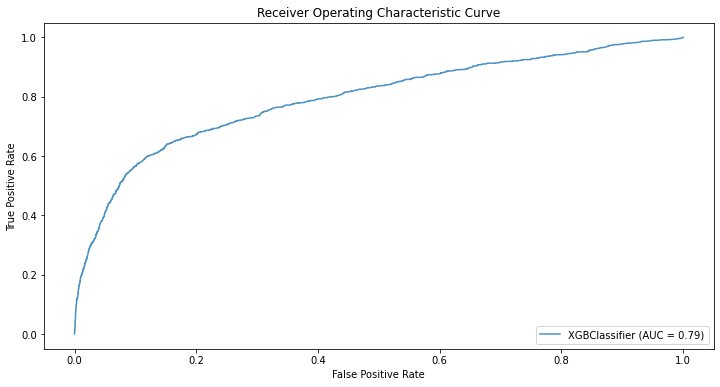

In [ ]:
rocCurveGraphic(xgboost,X_test,y_test)

<h6><font color='DARKBLUE'>LIGHT GBM MODEL <H6>

In [ ]:
def lightGbmModel(X_train,Y_train):
    # use LightGBM
    #!conda install -c conda-forge lightgbm
    from lightgbm import LGBMClassifier
    lightgbm=LGBMClassifier()
    lightgbm.fit(X_train,y_train)
    print('\nLight GBM Training Score:',lightgbm.score(X_train,Y_train))   
    return lightgbm,lightgbm.score(X_train,Y_train)

In [ ]:
lightgbm,lightgbmScore=lightGbmModel(X_train,y_train)


Light GBM Training Score: 0.9117218607361367


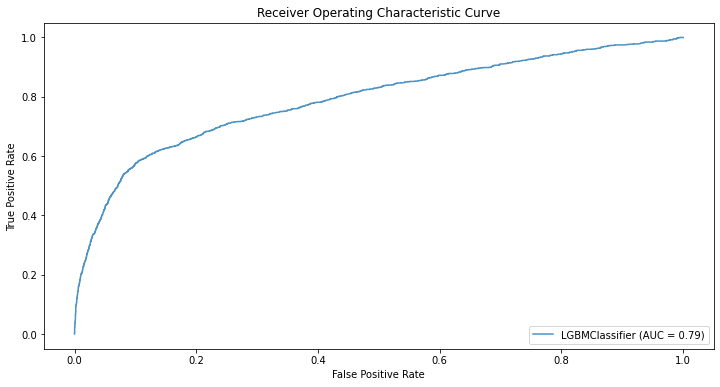

In [ ]:
rocCurveGraphic(lightgbm,X_test,y_test)

<h3><B>EVALUATION</B></H3>

<h6><font color='DARKBLUE'>COMPARING MODEL SCORES  <H6>

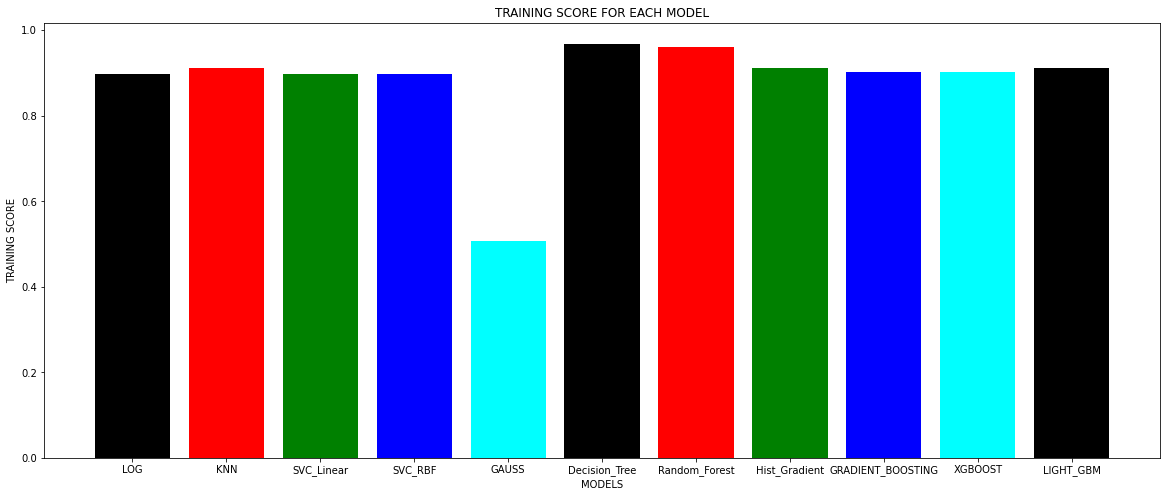

In [ ]:
scoreList=[logScore,knnScore,svc_linScore,svc_rbfScore,gaussScore,treeScore,forestScore,histgradScore,gbmScore,xgboostScore,lightgbmScore]
bars=("LOG","KNN","SVC_Linear","SVC_RBF","GAUSS","Decision_Tree","Random_Forest","Hist_Gradient","GRADIENT_BOOSTING","XGBOOST","LIGHT_GBM")
y_pos = np.arange(len(bars))
plt.figure(figsize=(20,8))
plt.bar(y_pos, scoreList, color=['black', 'red', 'green', 'blue', 'cyan','black', 'red', 'green', 'blue', 'cyan',"black"])
plt.ylabel('TRAINING SCORE')
plt.xlabel("MODELS")
plt.title('TRAINING SCORE FOR EACH MODEL')
plt.xticks(y_pos, bars)
plt.show()                                                                                                                            

<h6><font color='DARKBLUE'>RECEIVER OPERATING CHARACTERISTIC FOR ALL MODELS<H6>

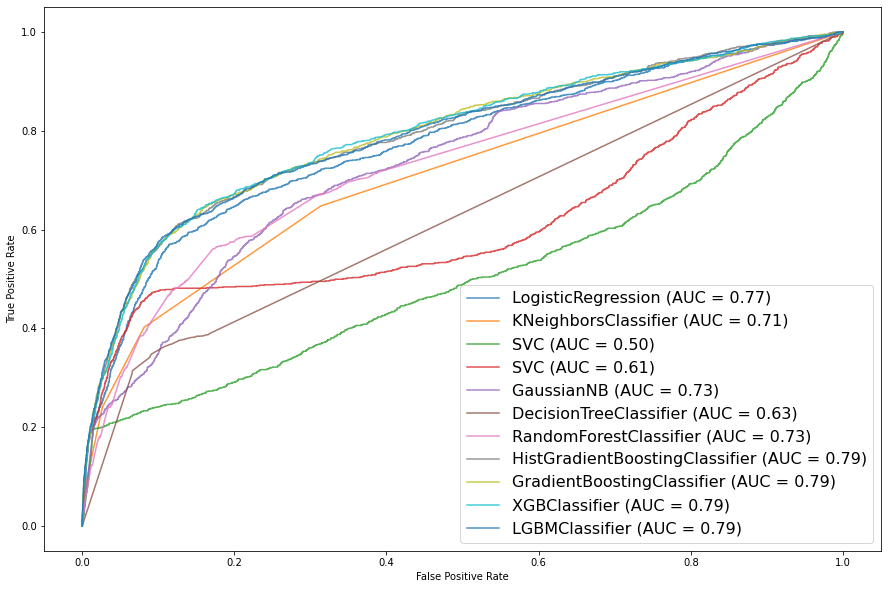

In [ ]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,10))
ax = plt.gca()
log_disp = plot_roc_curve(log, X_test, y_test, ax=ax, alpha=0.8)
knn_disp = plot_roc_curve(knn, X_test, y_test, ax=ax, alpha=0.8)
svc_lin_disp = plot_roc_curve(svc_lin, X_test, y_test, ax=ax, alpha=0.8)
svc_rbf_disp = plot_roc_curve(svc_rbf, X_test, y_test, ax=ax, alpha=0.8)
gauss_disp = plot_roc_curve(gauss, X_test, y_test, ax=ax, alpha=0.8)
tree_disp = plot_roc_curve(tree, X_test, y_test, ax=ax, alpha=0.8)
forest_disp = plot_roc_curve(forest, X_test, y_test, ax=ax, alpha=0.8)
histgrad_disp = plot_roc_curve(histgrad, X_test, y_test, ax=ax, alpha=0.8)
gbm_disp = plot_roc_curve(gbm, X_test, y_test, ax=ax, alpha=0.8)
xgboost_disp = plot_roc_curve(xgboost, X_test, y_test, ax=ax, alpha=0.8)
lightgbm_disp = plot_roc_curve(lightgbm, X_test, y_test, ax=ax, alpha=0.8)
plt.legend(loc = 'best', prop={'size': 16})
plt.show()

In [ ]:
roc_curve_values=dict()
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate= 0.02 , max_depth= 4, subsample= 0.6, n_estimators= 1000, min_child_samples= 5)
lgbm_tuned=lgbm.fit(X_train,y_train)
y_pred=lgbm_tuned.predict(X_test)
roc_curve_values["Light GBM Classifier"]=roc_auc_score(y_test,y_pred)
roc_auc_score(y_test,y_pred)

0.6201511102309089

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb_tuned=xgb.fit(X_train,y_train)
y_pred=xgb_tuned.predict(X_test)
roc_curve_values["XGBoost Classifier"]=roc_auc_score(y_test,y_pred)
roc_auc_score(y_test,y_pred)

0.6015192783252484

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

histgrad=HistGradientBoostingClassifier(max_depth=8,max_leaf_nodes=14,learning_rate=0.1)
histgrad_tuned=xgb.fit(X_train,y_train)
y_pred=histgrad_tuned.predict(X_test)
roc_curve_values["Histogram Gradient Boosting"]=roc_auc_score(y_test,y_pred)
roc_auc_score(y_test,y_pred)

0.6015192783252484

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#gbm=GradientBoostingClassifier(learning_rate= , max_depth= , min_samples_split= , n_estimators= )
gbm=GradientBoostingClassifier()
gbm_tuned=gbm.fit(X_train,y_train)
y_pred=gbm_tuned.predict(X_test)
roc_curve_values["Gradient Boosting Classifier"]=roc_auc_score(y_test,y_pred)
roc_auc_score(y_test,y_pred)

0.6036913290218602

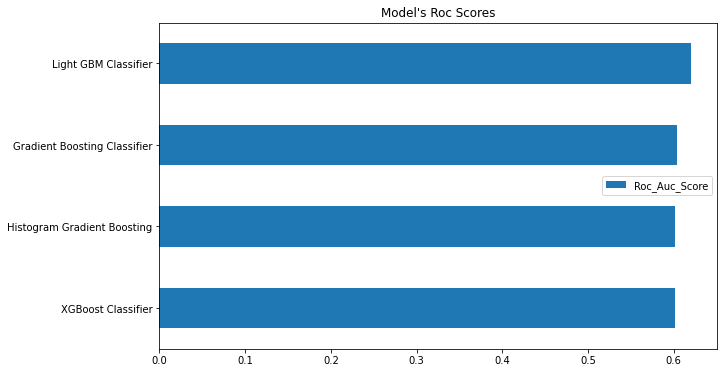

In [ ]:
roc_curve_values1=pd.DataFrame.from_dict(roc_curve_values, orient='index',columns=["Roc_Auc_Score"])
roc_curve_values1 = roc_curve_values1.sort_values(by=['Roc_Auc_Score'])
roc_curve_values1.plot(kind='barh', y='Roc_Auc_Score', figsize=(10,6), title="Model's Roc Scores");